# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

[146, 35, 179] 166419.286212
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7769,1936,2177,926,73,520
1,688,5491,11091,833,4239,436
2,3157,4888,2500,4477,273,2165


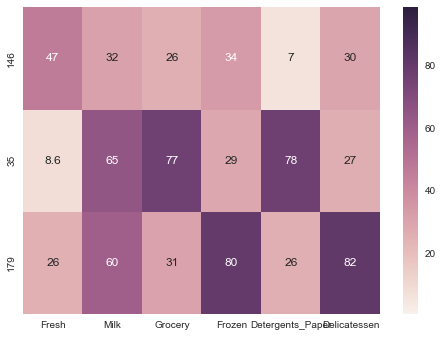

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import math

avoid_indices = [65, 66, 75, 128, 154] # from later in the problem set

def row_variance(df,i1,i2):
    return math.sqrt(sum((df.loc[i1]-df.loc[i2])**2))

def three_randoms(scalar):
    randoms = []
    while len(randoms) < 3:
        r = int(np.random.random(1)[0]*scalar)
        if r not in avoid_indices:
            randoms.append(r)
    return randoms

def three_variance(df, ix):
    i1_i2 = row_variance(df, ix[0], ix[1])
    i2_i3 = row_variance(df, ix[1], ix[2])
    i1_i3 = row_variance(df, ix[0], ix[2])
    return i1_i2 + i2_i3 + i1_i3

def find_three(df, n=100):
    best = 0
    best_index = []
    for i in range(0,n):
        ix = [int(x) for x in three_randoms(len(df))]
        this_score = three_variance(df, ix)
        if this_score > best:
            best_index = ix
            best = this_score
    return ix, best
 
np.random.seed(0) # the meaning of life
indices, error = find_three(data)
print indices, error

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
#samples_bar = samples.append(data.describe().loc['mean'])
#samples_bar.index = indices + ['mean']
#_ = samples_bar.plot(kind='bar', figsize=(14,6))

# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  Overall, we have a dataset where the means are less than the standard deviations, which occurs when we're skewed right, with many large outliers.  I wrote some code to pick 3 indices at random, and attempt to find those whose collective, squared distance from one another is maximal.  The code tries 100 random combinations and chooses the best 3.  I've added a seed so you should see the same numbers now.

As I understand the question, you guys seek a verbal description of the heat map above, which shows where items lie within the descriptive statistics.  I was answering them qualitatively which was falling short.  So, here goes!

The first sample is within the first standard deviation below the mean in all of the categories, ranging from 7th to 47th percentile (%).  The second sample is a low outlier in fresh (9%), roughly the mean in milk (65%), within one standard deviation above the mean in grocery (77%), barely in the first deviation below the mean in frozen (29%), within one standard deviation in detergents above the mean (78%), and one standard deviation below the mean in deli (27%).  The last sample is just within the first deviation below the mean in fresh (26%), practically the mean in milk (60%), in the first deviation below mean in grocery (31%), the first deviation above mean in frozen (80%), the first deviation below mean in detergents (26%), and in the first deviation above mean in deli (82%). 

As I ran my code several times, I noticed we had spending patterns that looked like individuals, families, small deli's, restaurants and perhaps coffee houses with lots of milk.

Statistically, I've used SeaBorn's heat map to understand where these samples fit (thanks for the tip!).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [293]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

scores = {}
for col in list(data.axes[1]):
    new_data = data.drop([col], axis=1)
    X = new_data.values
    y = data[col].values

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Repeat this 100x to even out variations.
    r2s = []
    for turn in range(0,100):
        regressor = DecisionTreeRegressor(random_state=turn*100)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)   

        # TODO: Report the score of the prediction using the testing set
        r2s.append(r2_score(y_test, y_pred))
    r2 = sum(r2s)/len(r2s)
    if r2 > 0:
        scores[col] = r2
        z = zip(new_data.axes[1], regressor.feature_importances_)
        influencers = [e[0] for e in sorted(z, key=lambda x: -1*x[1]) if e[1] > .2]
        print col, "is driven by", influencers
    else:
        print col, "is not predictable"

print "\nScores:"
for key in scores:
        print key, scores[key]

Fresh is not predictable
Milk is driven by ['Detergents_Paper', 'Grocery']
Grocery is driven by ['Detergents_Paper']
Frozen is driven by ['Delicatessen', 'Detergents_Paper', 'Fresh']
Detergents_Paper is driven by ['Grocery']
Delicatessen is not predictable

Scores:
Frozen 0.1429848329
Grocery 0.617334649599
Detergents_Paper 0.698943964576
Milk 0.196217326477


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  I tired 'em all.  I wrote some code to explore the various features, printing out the various r2 scores as above. Grocery and detergents determine each other.  Those in turn help determine the quantity of Milk.  What I find interesting is that purchasing of fresh and deli goods helps us determine the quantity of frozen goods.  Fresh and deli seem to stand apart.

As for raw R2 scores, detergent is the most predictable, followed by groceries.  Perhaps we can drop detergent?  Even weirder, we might also consider dropping groceries.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

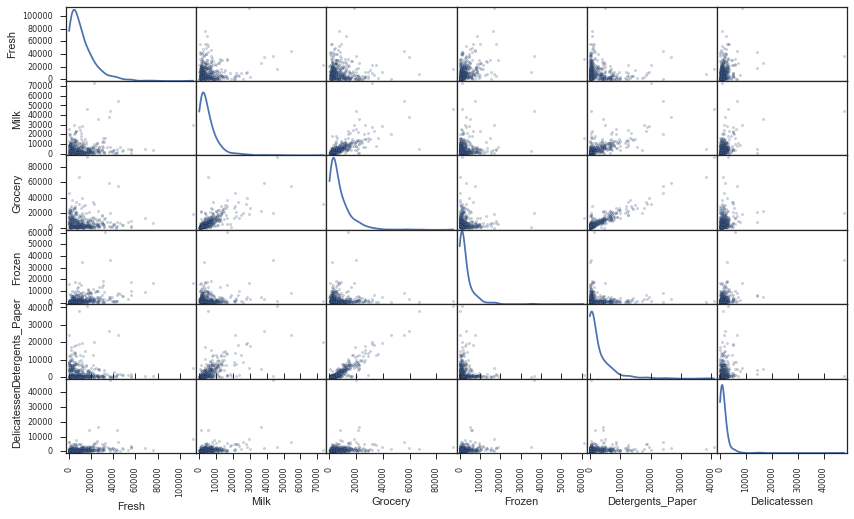

In [294]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** This n^2 scatter plot sure is a neat trick!  To think I was trying to do some of this my lowly Python hackery... We see correlated pairs similar to what the code found, confirming my assumptions.  Detergent and groceries correlate well.  Groceries and milk also correlate, but not as strong.  Same with milk and detergents.  Deli and fresh stand alone as before.

The data are not normally distributed and seem skewed to the low end, with tails on the right. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

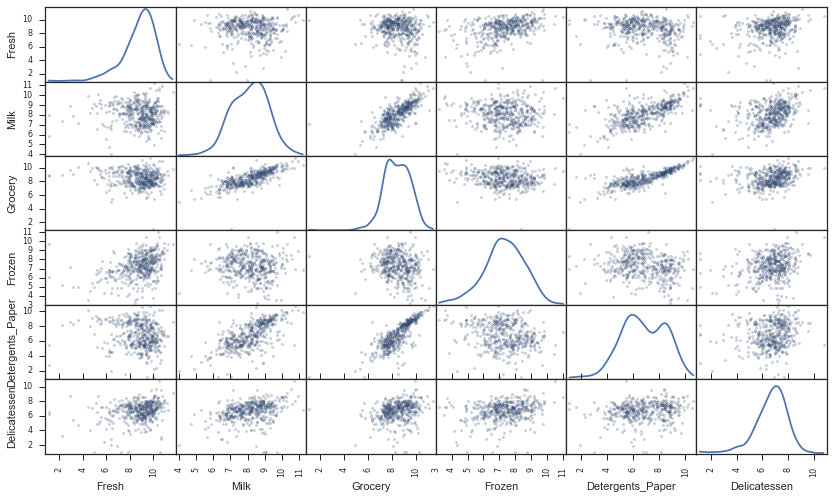

In [295]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [296]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.957897,7.568379,7.685703,6.830874,4.290459,6.253829
1,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642
2,8.057377,8.494539,7.824046,8.406708,5.609472,7.680176


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [297]:
# For each feature find the data points with extreme high or low values
bad = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    bad += list(outliers.index)
    display(outliers)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(set([x for x in bad if bad.count(x) > 1]))
print "Bad outliers: ", sorted(outliers)

# UNCOMMENT THE NEXT LINE if you want to see what happens when the outliers
# are not removed.  I toggled this to see the difference with and without
# outliers.  The modeling is much more consistent and separable with them 
# gone IMHO.
# outliers = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Bad outliers:  [65, 66, 75, 128, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** I found 5 datapoints (customers) that had multiple outliers, shown as "bad outliers" in the code above.  This was a smaller set than any customer who had one outliers.  I'm hoping it will clean up the distributions. I removed all these, then went back in the project to adjust my "sample set," ensuring no overlaps.  Then I updated the project accordingly.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

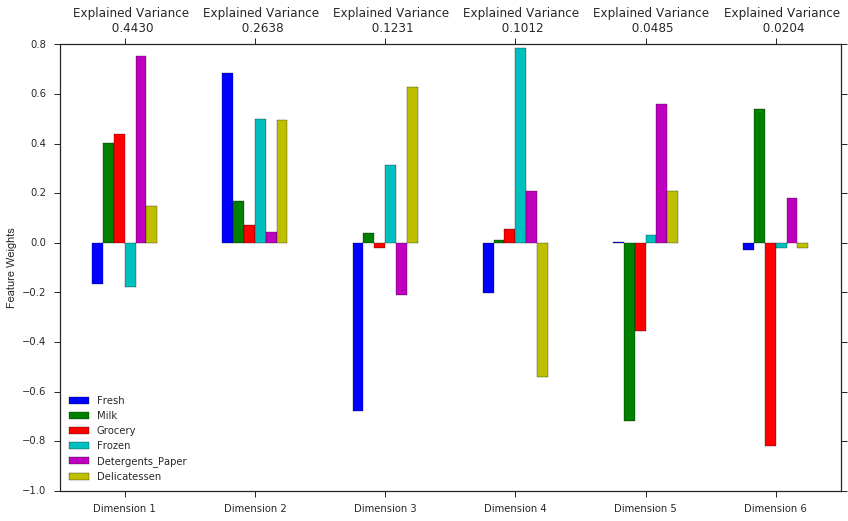

In [298]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, copy=True)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** Nearly 71% of the variance is explained in the first two principal components. This extends to 93% when we consider the first four components.   The first component looks like basic grocery shopping for individuals or families, with milk, groceries, and cleaning supplies.  The second is a combination of fresh, frozen, and deli, which sure sounds like a local deli or buying for dinner that night.  The third is exclusively deli and frozen items, with a bias against fresh items and cleaning supplies, perhaps a gas station?  The fourth is a focus on frozen items with a tad of cleaning supplies, or long term supplies.  I'm thinking diner.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.4592,-0.5885,-0.0383,-0.7641,-0.8301,-0.1112
1,2.1231,-1.9295,0.6099,0.6990,0.0618,-0.0670
2,-0.9519,0.5080,1.7200,0.1801,-0.4610,0.4818


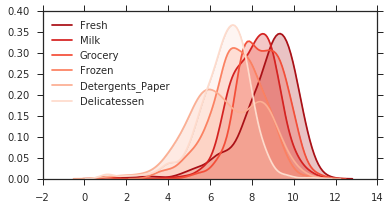

In [299]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


import matplotlib.pyplot as plt

# specify plot style and set color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log-transformed data
    plt.figure(figsize=(6,3))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc=2);

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [300]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [301]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.4592,-0.5885
1,2.1231,-1.9295
2,-0.9519,0.5080


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-means is the simplest of the clustering algorithms, giving us a hint as to the varaibility of the data.  We can easily try multiple values of K to get a good sense of what works, and what doesn't.  K-Means is great when solutions are linearly separable.  Real data is rarely that clean

Later we can use a small number of values of K in more sophisticated algorithms.  I'll lean towards using K-Means to figure out a reasonable K, then dive in deeper with GMM which handles nuance better, judging points with shades of gray vs. black and white.  GMM is best for assigning a relative, probabilistic strength to each data point.  That seems a better fit for this problem as the data seems to be clumped together, at least according to the scatter plots. GMM will give us a sense of how strongly the model believes a point is one cluster or another.  That can help the food business decide how best to treat each customer.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [302]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

scores = {}
def compute_cluster(n):
    # oh gads
    global preds, centers, sample_preds
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n, random_state=0)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[n] = score


for n in range(2, 9):
    compute_cluster(n)  

print "Silhouette scores by cluster count:"
best_n = 0
best_score = 0
for n in scores:
    s = scores[n]
    if s > best_score:
        best_score = s
        best_n = n
    print n, scores[n]
    
g = GMM(n_components=2, random_state=0)
g.fit(reduced_data)
g_preds = g.predict(reduced_data)
g_centers = g.means_
g_score = silhouette_score(reduced_data, g_preds)

print "Best n is ", best_n, "and GMM score is ", g_score

# In the revised submission, I now stick with the GMM model.
if True or g_score > best_score:
    preds = g_preds
    centers = g_centers
    score = g_score
    sample_preds = g.predict(pca_samples)
else:
    compute_cluster(best_n) # restore our variables for the notebook

Silhouette scores by cluster count:
2 0.426281015469
3 0.39689092645
4 0.332009582682
5 0.350990778931
6 0.366608987343
7 0.363315403845
8 0.350994069935
Best n is  2 and GMM score is  0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  Please see above.  The best score for the reduced data has only 2 clusters, followed closely by 3.  I'll try both in GMM.  As it turns out, KMeans is doing better for me.  Thank you, Occam's razor.

[Ed. note: As suggested in the first review of this project, I re-ran the models without removing outliers.  The clustering is much less effective!  I'm seeing a lot more bleed-through from one cluster to another.  We've seen this before in descriptive statistics, also known as the Bill Gates Sat at the Bar problem.  What happens to the average wage the bar when that happens?  Boom.  Time for Bill to go.]

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

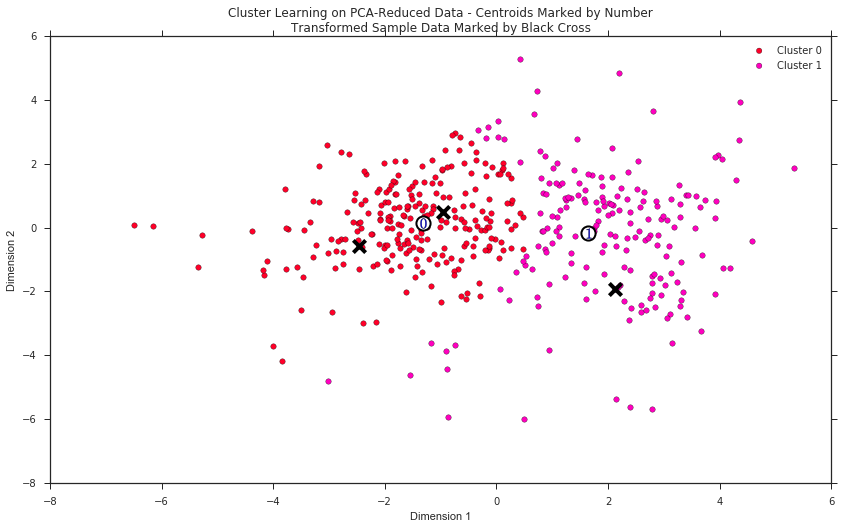

In [303]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [304]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812,2052,2689,2058,337,712
Segment 1,4316,6347,9555,1036,3046,945


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  The first segment shows an average purchase of fresh items, with below average but within one standard deviation on all others.  This sounds like individuals or families.  The second segment shows lower on the fresh items, but purchases in the 70-95th percentile for weekly maintenance items.  That sure looks a lot like a deli or restaurant.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [305]:
   # look at just the 3 sample points
samples_proba = g.predict_proba(pca_samples)

for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster {} ({:.2f}%)".format(pred, samples_proba[i][pred]*100)

Sample point 0 predicted to be in Cluster 0 (97.19%)
Sample point 1 predicted to be in Cluster 1 (94.30%)
Sample point 2 predicted to be in Cluster 0 (88.54%)


**Answer:**  The actual predictions are consistent for my first two, with high confidence.  The third point is predicted to be in the first, where apparently fresh vegetables drives us more towards segment 0, even if it is a heavy spend.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  I'd try a 5-day delivery on a random sample from the "business" segment #1. In particular, I'd pick those customers with a higher likelihood than others, as predicted by the Gaussian mixed model.  We want to get samples close to centers.

Segment 1 customers are purchasing larger quantities of groceries, frozen items, and cleaning supplies. If the customers are more satisfied, they can ramp to the entire "business" segment.  What would be interesting is to add data to this set, indicating the level of satisfaction a customer had, or NaN if not available.  The other segment purchases much less, so I think would be satisfied with less frequent delivery of 3 times a week.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**  We would add a new label, "customer segment," which we calculate from PCA then add this to the original dataset of product spending.  Next, we'd create a decision tree classifier that helps us determine the target variable, customer segment, then use this tree in practice. A new customer would run through the decision tree to determine "individual and 3-day" or "business and 5-day" delivery. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

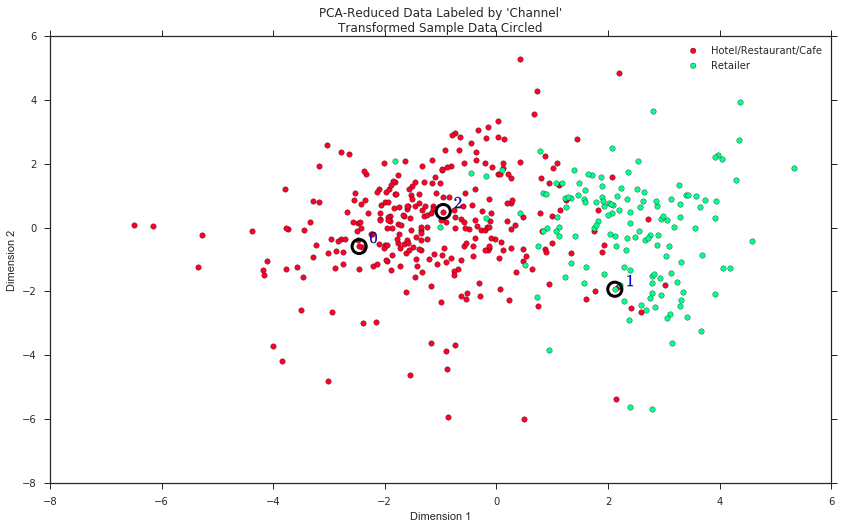

In [306]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  Well, son of a gun!  We guessed the clusters right and now the predictions make sense.  The two centers would be right in the middle of each type of sales channel.  We do have crossovers.  My guess of sending goods 5x a week to retailers makes sense vs. restaurants whose busy times are usually on the weekends.  This would suggest a nuanced approach for higher customer satisfaction.  Start with a customer in a segment, then track customer sat.  If it plummets on lower deliveries, shift them to a different program, perhaps in return for committing to purchasing less.  Think Amazon Prime.

Without knowing much about the grocer, I classified restaurant customers as "individuals / families."  Perhaps restaurants like fresher foods and buy more consistently, with refrigerators to store foods for a few days.  Retailers were "businesses," right on the money.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.